# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) # YOUR CODE HERE
        city_weather = city_weather.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.57,83,80,8.92,NZ,1713734919
1,blackmans bay,-43.0167,147.3167,10.07,92,8,2.07,AU,1713734942
2,san patricio,28.0170,-97.5169,23.40,53,74,7.04,US,1713735513
3,edinburgh of the seven seas,-37.0676,-12.3116,16.93,79,44,7.96,SH,1713735224
4,hasaki,35.7333,140.8333,14.22,78,100,2.92,JP,1713735515


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

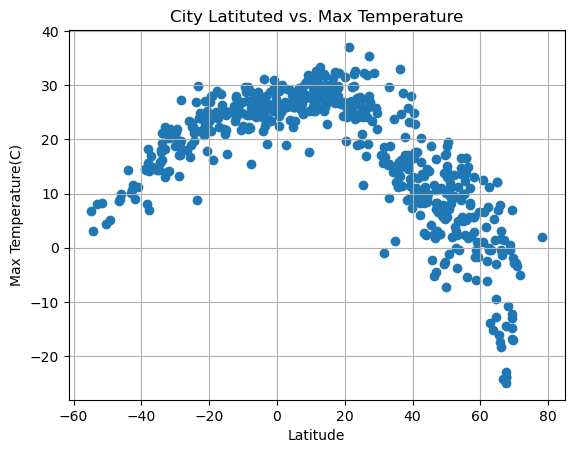

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature(C)")
plt.grid()
plt.title("City Latituted vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

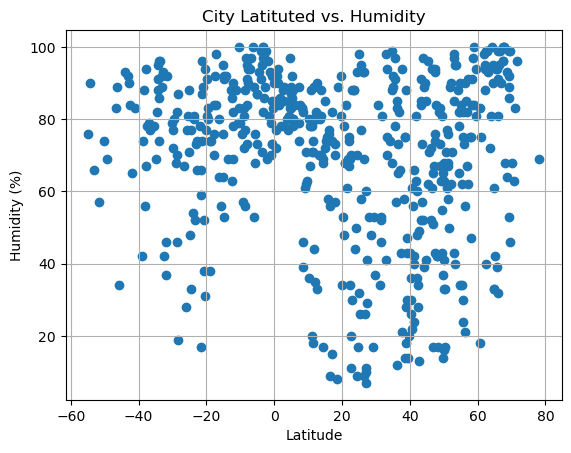

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latituted vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

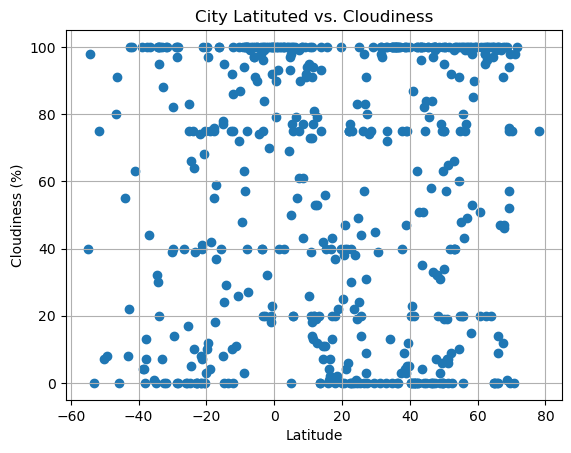

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latituted vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

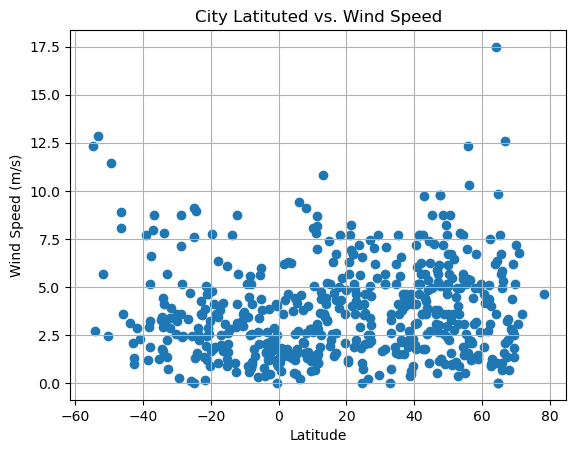

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latituted vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def plot_linear_regression(data_frame, y_str):
    x_values = data_frame['Lat']
    y_values = data_frame[y_str]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(x_values.min() + .5, y_values.max() - 1), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_str)
    print(f"The r-quared is: {rvalue**2}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san patricio,28.0170,-97.5169,23.40,53,74,7.04,US,1713735513
4,hasaki,35.7333,140.8333,14.22,78,100,2.92,JP,1713735515
5,aasiaat,68.7098,-52.8699,0.50,93,100,2.79,GL,1713735516
8,novodolinskiy,49.7050,72.7047,5.32,65,0,2.98,KZ,1713735517
9,abu dhabi,24.4667,54.3667,27.19,70,0,0.00,AE,1713735517


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,8.57,83,80,8.92,NZ,1713734919
1,blackmans bay,-43.0167,147.3167,10.07,92,8,2.07,AU,1713734942
3,edinburgh of the seven seas,-37.0676,-12.3116,16.93,79,44,7.96,SH,1713735224
6,lospalos,-8.5186,127.0025,21.83,88,100,2.51,TL,1713735516
7,port lincoln,-34.7333,135.8667,14.39,69,0,3.26,AU,1713735516


###  Temperature vs. Latitude Linear Regression Plot

The r-quared is: 0.722514084017306


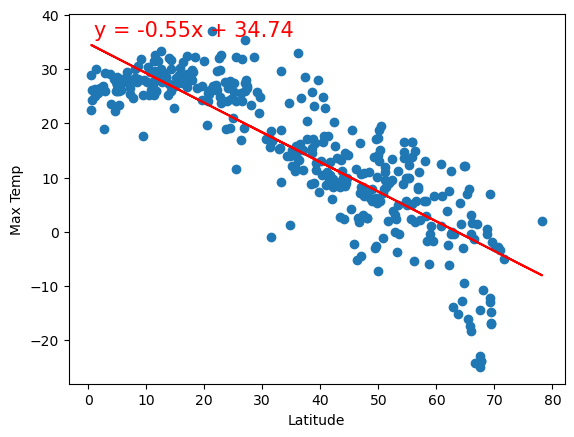

In [49]:
# Linear regression on Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Max Temp')

The r-quared is: 0.6858078670777488


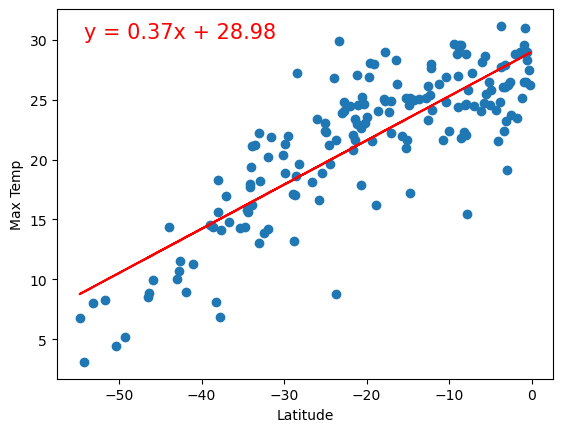

In [50]:
# Linear regression on Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Max Temp')

**Discussion about the linear relationship:** When you are closer the the equator(Latitude 0) your maxium tempature is higher

### Humidity vs. Latitude Linear Regression Plot

The r-quared is: 0.0013691411583536953


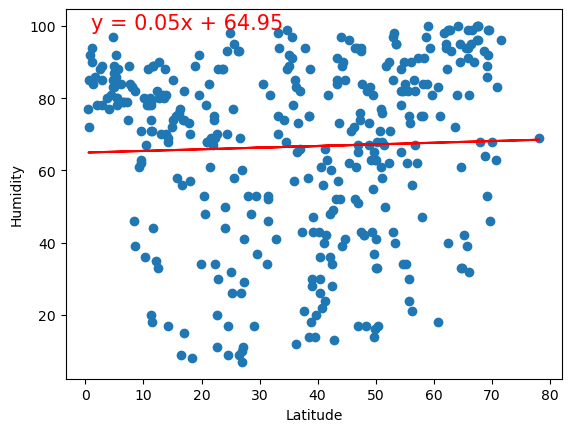

In [51]:
# Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Humidity')

The r-quared is: 0.05354973914488538


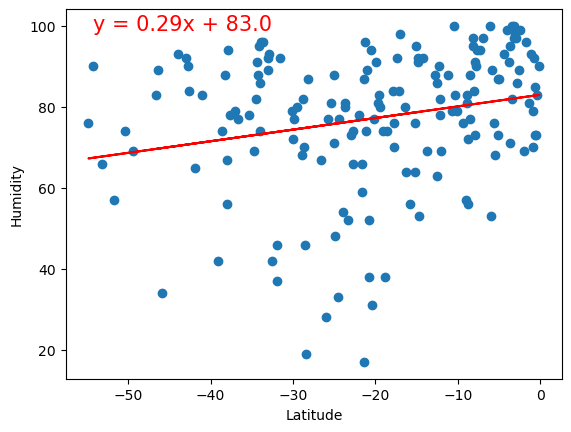

In [52]:
# Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-quared is: 0.001978935419410212


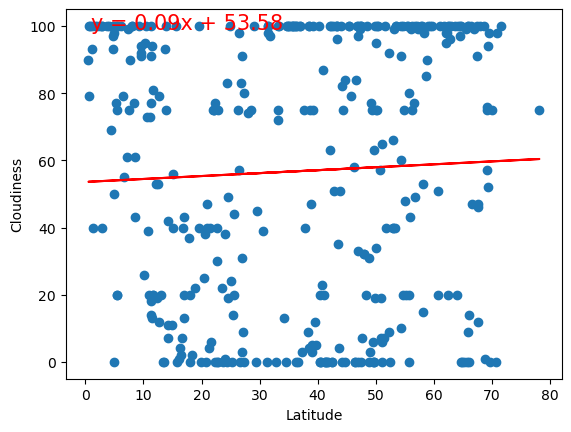

In [53]:
# Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Cloudiness')

The r-quared is: 0.06972623447263379


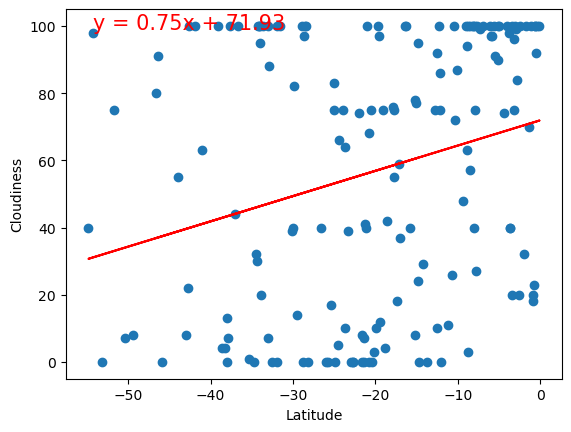

In [54]:
# Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-quared is: 0.012621779550807342


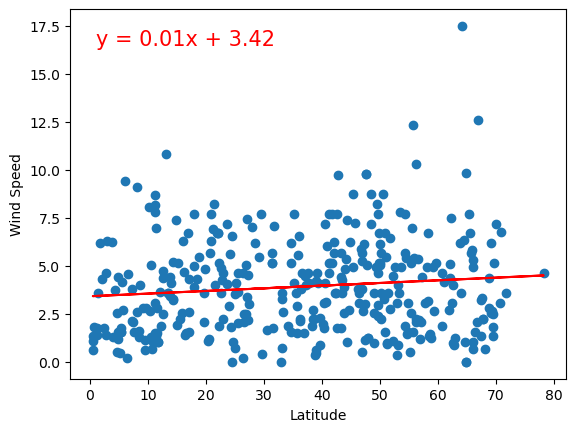

In [55]:
# Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Wind Speed')

The r-quared is: 0.1438790781828829


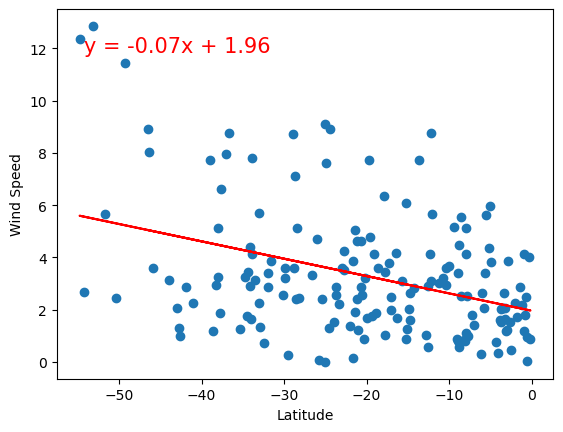

In [56]:
# Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE